# Azure LLM inference traces
The trace description can be found [here](https://github.com/Azure/AzurePublicDataset/blob/master/AzureLLMInferenceDataset2023.md).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
TRACE_NAMES = [
    "Coding",
    "Conversation",
]

In [3]:
TRACE_FILENAMES = [
    "AzureLLMInferenceTrace_code.csv",
    "AzureLLMInferenceTrace_conv.csv",
]

In [4]:
# Read all traces
df_traces = {}
for trace_name, trace_filename in zip(TRACE_NAMES, TRACE_FILENAMES):
    df_traces[trace_name] = pd.read_csv(trace_filename, parse_dates=["TIMESTAMP"])

In [5]:
df_traces["Conversation"]

,TIMESTAMP,ContextTokens,GeneratedTokens
0,2023-11-16 18:15:46.680590,374,44
1,2023-11-16 18:15:50.995169,396,109
2,2023-11-16 18:15:51.222467,879,55
3,2023-11-16 18:15:51.391017,91,16
4,2023-11-16 18:15:52.573245,91,16
...,...,...,...
19361,2023-11-16 19:14:04.144233,1131,397
19362,2023-11-16 19:14:04.560504,399,181
19363,2023-11-16 19:14:04.710779,1120,466
19364,2023-11-16 19:14:07.740844,1030,434


In [6]:
df_traces["Coding"]

,TIMESTAMP,ContextTokens,GeneratedTokens
0,2023-11-16 18:17:03.979960,4808,10
1,2023-11-16 18:17:04.031960,3180,8
2,2023-11-16 18:17:04.078149,110,27
3,2023-11-16 18:17:04.120644,7433,14
4,2023-11-16 18:17:04.424954,34,12
...,...,...,...
8814,2023-11-16 19:14:18.727875,2586,13
8815,2023-11-16 19:14:18.926728,1527,6
8816,2023-11-16 19:14:19.527506,1527,14
8817,2023-11-16 19:14:19.658236,804,6


Coding


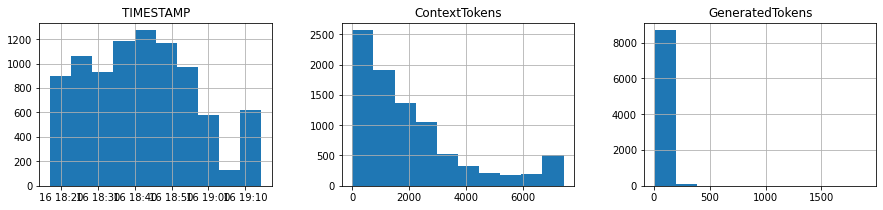

Conversation


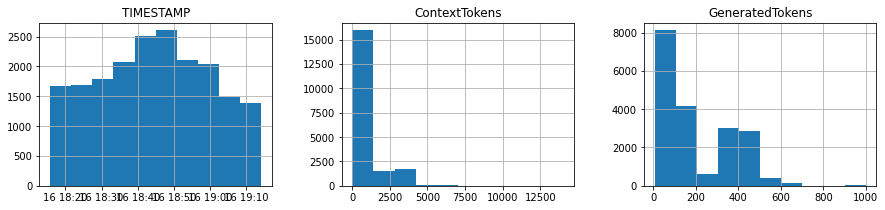

In [7]:
for trace_name, df_trace in df_traces.items():
    print(trace_name)
    df_trace.hist(
        layout=(1, 3),
        figsize=(15, 3),
    )
    plt.show()

## Token distributions

In [8]:
def get_cdf(df, field):
    vals = sorted(df[field].values)
    invs = 100.0 * np.arange(0, len(df)) / len(df)
    return vals, invs

In [9]:
def plt_tokens(dfs, field="ContextTokens", title="Input Tokens"):
    for df_key, df in dfs.items():
        df_tokens, df_inv = get_cdf(df, field)
        plt.plot(df_tokens, df_inv, label=df_key)
    plt.title(title)
    plt.ylabel("CDF")
    plt.xlabel("Number of tokens")
    plt.legend()
    plt.grid()
    plt.show()

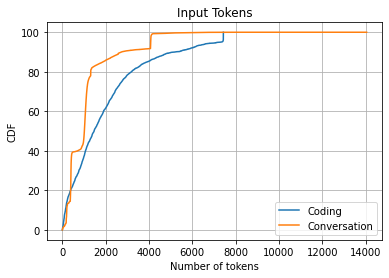

In [10]:
plt_tokens(df_traces, "ContextTokens", "Input Tokens")

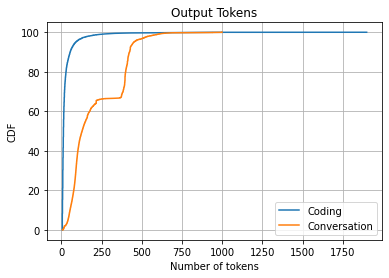

In [11]:
plt_tokens(df_traces, "GeneratedTokens", "Output Tokens")

## Correlation

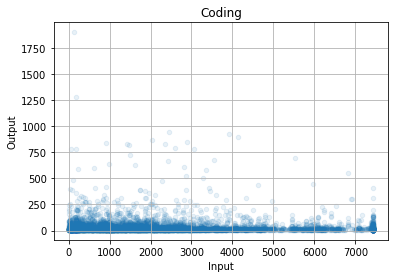

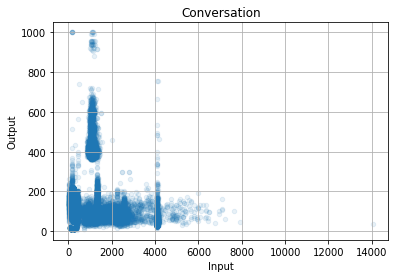

In [12]:
for trace_name, df_trace in df_traces.items():
    df_trace[["ContextTokens", "GeneratedTokens"]].plot.scatter(
        x="ContextTokens",
        y="GeneratedTokens",
        xlabel="Input",
        ylabel="Output",
        alpha=0.1,
        grid=True,
        title=trace_name,
    )
    plt.show()

## Analysis over time

In [13]:
def plt_invocations_time(df):
    df_copy = df.copy()
    df_copy["Time"] = df_copy["TIMESTAMP"].dt.round(freq="min")
    df_copy.groupby("Time").count()["TIMESTAMP"].plot(
        grid=True,
        ylim=0,
    )
    plt.ylabel("Number of invocations per minute")
    plt.show()

In [14]:
def plt_tokens_time(df, field="ContextTokens", label="Input", show=False):
    df_copy = df.copy()
    df_copy["Time"] = df_copy["TIMESTAMP"].dt.round(freq="min")
    df_copy.groupby("Time").sum()[field].plot(
        grid=True,
        ylim=0,
        label=label,
    )
    plt.ylabel("Number of tokens per minute")
    plt.legend()
    if show:
        plt.show()

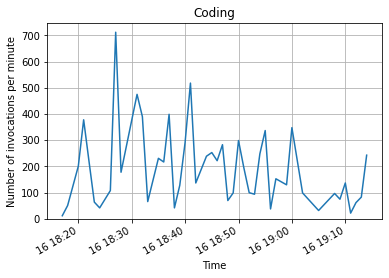

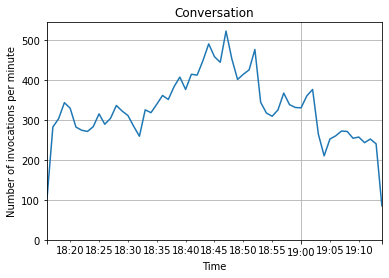

In [15]:
for trace_name, df_trace in df_traces.items():
    plt.title(trace_name)
    plt_invocations_time(df_trace)

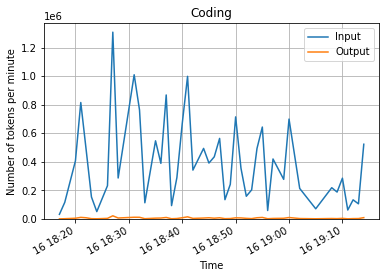

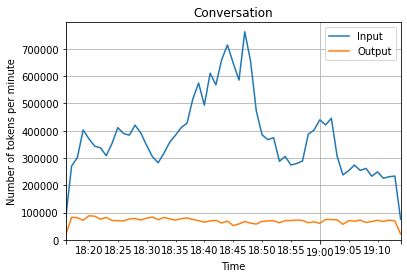

In [16]:
for trace_name, df_trace in df_traces.items():
    plt.title(trace_name)
    plt_tokens_time(df_trace, "ContextTokens", "Input")
    plt_tokens_time(df_trace, "GeneratedTokens", "Output")
    plt.show()